In [65]:
import gym
# Import Game
import gym_tetris
import numpy as np
# Joypad Wrapper
from nes_py.wrappers import JoypadSpace
# Import simplified controls
from gym_tetris.actions import SIMPLE_MOVEMENT

In [66]:
class TetrisEnv(gym.Env):
    def __init__(self):
        self.env = JoypadSpace(gym_tetris.make('TetrisA-v0'), SIMPLE_MOVEMENT)
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space

    def reset(self):
        return self.env.reset()

    def step(self, action):
        obs, reward, done, info = self.env.step(action)
        obs = np.array(obs).astype(np.float32)
        return obs, reward, done, info

    def render(self, mode='human'):
        self.env.render(mode=mode)

    def close(self):
        self.env.close()



{'render.modes': ['human', 'rgb_array']}

In [8]:
#pip install ''

zsh:1: no matches found: stable-baselines3[extra]
Note: you may need to restart the kernel to use updated packages.


In [7]:



done = False
while not done:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    env.render()
    
env.close()

In [67]:
from gym.wrappers import FrameStack, GrayScaleObservation

from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

from matplotlib import pyplot as plt

In [109]:
env = TetrisEnv()
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')


In [114]:
state = env.reset()


In [115]:
state.shape

(1, 240, 256, 4)

In [71]:
state, reward, done, info = env.step([3])

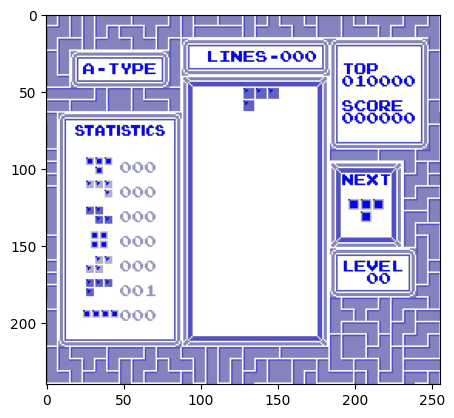

In [72]:
plt.imshow(state[0])

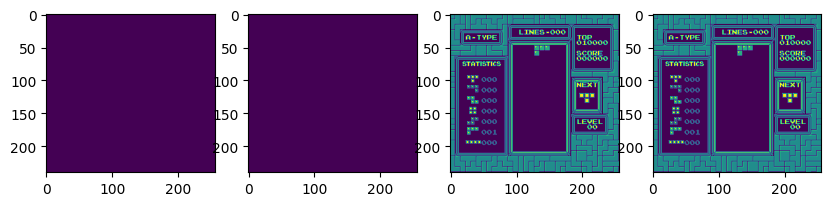

In [73]:
plt.figure(figsize=(10,8))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [91]:
import random
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [92]:
episodes = 2
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([np.arange(6)])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:[0.]


KeyboardInterrupt: 

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import  Dense, Flatten
from keras.optimizers import Adam
from keras import layers
#-------------------------------
#Second Try for Model
# from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import BaseCallback

In [2]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [127]:
def build_model(states, actions):
    model = keras.Sequential(
        [
            keras.Input(shape=(240, 256, 4)),
            layers.Conv2D(32, 8, strides=4, activation="relu"),
            layers.Conv2D(64, 4, strides=2, activation="relu"),
            layers.Conv2D(64, 3, strides=1, activation="relu"),
            layers.Flatten(),
            layers.Dense(512, activation="relu"),
            layers.Dense(actions, activation="linear"),
        ]
    )
    return model


In [3]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [ ]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [128]:
states = env.observation_space.shape[0]
actions = env.action_space.n
model = build_model(states, actions)

In [129]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 59, 63, 32)        8224      
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 30, 64)        32832     
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 28, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 46592)             0         
                                                                 
 dense_13 (Dense)            (None, 512)               23855616  
                                                                 
 dense_14 (Dense)            (None, 6)                 3078      
                                                                 
Total params: 23,936,678
Trainable params: 23,936,678


In [130]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [131]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                   nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [132]:
dqn = build_agent(model, actions)

TypeError: Keras symbolic inputs/outputs do not implement `__len__`. You may be trying to pass Keras symbolic inputs/outputs to a TF API that does not register dispatching, preventing Keras from automatically converting the API call to a lambda layer in the Functional Model. This error will also get raised if you try asserting a symbolic input/output directly.

In [84]:
# model = DQN("MlpPolicy", env, verbose=1, learning_rate=0.000001)
model.learn(total_timesteps=1000000, callback=callback)
# model.save("dqn_cartpole")

Using cpu device
Wrapping the env in a VecTransposeImage.


/opt/homebrew/lib/python3.9/site-packages/stable_baselines3/common/buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 491.54GB > 3.09GB
  warnings.warn(


In [ ]:
state = env.reset()

In [ ]:
state = env.reset()
while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()